In [2]:
from model_complex import Calibration, EpidData, FactoryBRModel
import matplotlib.pyplot as plt

data = EpidData('spb', './', '7-01-2018', '6-20-2019')
init_infect = [100]
model = FactoryBRModel.get_model('total')

d = Calibration(init_infect, model, data)
idata, data, simulation_func = d.abc_calibration()

Initializing SMC sampler...
Sampling 6 chains in 6 jobs


The rhat statistic is larger than 1.01 for some parameters. This indicates problems during sampling. See https://arxiv.org/abs/1903.08008 for details
The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details


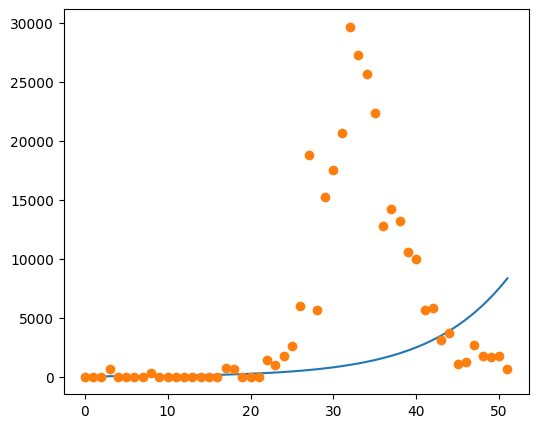

In [4]:
fig, ax = plt.subplots(1, 1, figsize=(6, 5))
start_day = 15    
posterior = idata.posterior.stack(samples=("draw", "chain"))
alpha = [posterior["a"].mean()]
beta = [posterior["b"].mean()] 

ax.plot(simulation_func(None, alpha, beta))

ax.plot(list(data), "o")



In [8]:
from sklearn.metrics import r2_score
r2_score(list(data)[int(len(data)/2):], simulation_func(None, alpha, beta)[int(len(data)/2):])

0.801772825699964